### **Modelo de Ising cuántico unidimensional en una grilla de N espines: Análisis Espectral**


Se debe implementar el modelo de Ising unidimensional para N espines 1/2 en una grilla periódica. El Hamiltoniano del sistema está dado por:

$$
H = -J \sum_{i=1}^{N}\sigma_i^z \sigma_{i+1}^z - g \sum_{i=1}^{N} \sigma_i^x
$$

donde:

- \( H \) es el Hamiltoniano.
- \( J \) escala energética que determina la interacción ferromagnética
- \( g\) es parámetro magnético del campo transversal.

# Matrices de Pauli

Las matrices de Pauli son un conjunto de tres matrices \( $2 \times 2$ \) que se utilizan frecuentemente en física cuántica para describir los operadores de espín. Las matrices de Pauli son:

- **Matriz \( $\sigma_x$ \)**:
  $$ \sigma_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} $$

- **Matriz \( $\sigma_y$ \)**:
  $$ \sigma_y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} $$

- **Matriz \( $\sigma_z$ \)**:
  $$ \sigma_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} $$

Para un sistema de $N$  espines, las matrices de Pauli deben ser representadas en un espacio de Hilbert de dimensión $ 2^N $. Las matrices $ \sigma_i^\alpha $ para cada espín $i$-ésimo son matrices \($ 2^N \times 2^N $\) que actúan solo en el espín $i$-ésimo, dejando los otros espines sin alterar. Esto se consigue utilizando el producto tensorial (producto de Kronecker).

### Forma General

La forma general de $ \sigma_i^\alpha $ donde $\alpha $ puede ser $ x$, $y $ o $ z $ para el $i$-ésimo espín en un sistema de $ N $ espines es:

$$ \sigma_i^\alpha= I_2 \otimes I_2 \otimes \cdots \otimes \sigma^\alpha \otimes \cdots \otimes I_2 $$

Donde:
- $ \sigma^\alpha $ está en la posición $ i $-ésima.
- $ I_2 $ es la matriz identidad \( $ 2 \times 2 $\).

Esto significa que $\sigma^α_i$ actúa como $ \sigma^\alpha $  en el $  i $ -ésimo espín y como la matriz identidad en todos los demás espines.

Sin embargo, el producto tensorial de matrices identidad es otra matriz identidad de mayor dimensión, de forma que se puede reducir a sólo dos productos tensoriales:

$$ \sigma_i^\alpha= I_{2i} \otimes \sigma^\alpha \otimes I_{2(N-i-1)} $$

Partiendo de esto, se crea una funci ón $S(N,\sigma^\alpha)$ que devuelve una matriz $S\alpha$ que contiene todas las $N$ matrices $\sigma^\alpha_i$:

 $$ S\alpha = [\sigma^\alpha_1, \sigma^\alpha_2, \cdots, \sigma^\alpha_N] $$

 De forma que $S\alpha[0]$=$\sigma^\alpha_1$ y $S\alpha[N-1]$=$\sigma^\alpha_N$

In [ ]:
import numpy as np

# Definición de las matrices de Pauli sigma_x y sigma_z
sx = np.array([[0, 1], [1, 0]])
sz = np.array([[1, 0], [0, -1]])

# Función para generar las matrices sigma_z^(i) y sigma_x^(i) para N espines
def S(N, s):
    S = []
    for i in range(N):
        # Matriz identidad de tamaño 2^i
        identidad_izquierda = np.eye(2 ** i)  # Matriz identidad resultante a la izquierda
        # Producto de Kronecker de la identidad izquierda y sigma
        s_i = np.kron(identidad_izquierda, s)
        # Matriz identidad de tamaño 2^(N - i - 1)
        identidad_derecha = np.eye(2 ** (N - i - 1))  # Matriz identidad resultante a la derecha
        # Producto de Kronecker de sigma_i y la identidad derecha
        s_i = np.kron(s_i, identidad_derecha)
        # Añadir la matriz resultante a la lista
        S.append(s_i)
    return S

def hamiltonian(J, g, N):
    Sz = S(N, sz)
    Sx = S(N, sx)
    N
    suma_z = 0
    suma_x = 0

    if N > 2:
      for i in range(0, N):
        suma_z+=Sz[i]@Sz[(i+1)%N]
        suma_x+=Sx[i]
    else:
      for i in range(0, N-1):
        suma_z+=Sz[i]@Sz[(i+1)]
      for i in range(0, N):
        suma_x+=Sx[i]
    return -J*suma_z-g*suma_x

H = hamiltonian(2, 1, 2)

eigenvalues, eigenvectors = np.linalg.eig(H)
D = np.diag(eigenvalues)

print("El hamiltoniano es: ")
print(H)
print("La matriz diagonalizada es: ")
print(D)
print("Los autovalores son: ")
print(eigenvalues)

El hamiltoniano es: 
[[-2. -1. -1. -0.]
 [-1.  2. -0. -1.]
 [-1. -0.  2. -1.]
 [-0. -1. -1. -2.]]
La matriz diagonalizada es: 
[[-2.82842712  0.          0.          0.        ]
 [ 0.         -2.          0.          0.        ]
 [ 0.          0.          2.82842712  0.        ]
 [ 0.          0.          0.          2.        ]]
Los autovalores son: 
[-2.82842712 -2.          2.82842712  2.        ]


Al ser una grilla periódica, se consideró la condición de frotnera periódica:
$$ \sigma_{(N+k)}^z = \sigma_{k}^z$$

<center>

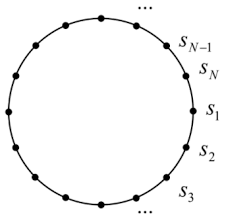

## Escalar el hamiltoniano a la mayor cantidad de espines posibles:
Para esto se pasa a trabajar con sistemas de matrices dispersas, cuya cualidad es que almancenan y trabajan solo con los elementos no nulos, lo cual ahorra memoria y tiempo de ejecusión, además se puede usar kron de scipy en lugar de np.kron, lo cual hace eficiente el trabajo con matrices dispersas. La función para la construcción del Hamiltoniano puede recibir como argumento la cantidad de espines.

In [ ]:
import numpy as np
from scipy.sparse import kron, eye, csc_matrix

In [ ]:
# Matrices de Pauli
sx = csc_matrix([[0, 1], [1, 0]])  # Pauli X
sz = csc_matrix([[1, 0], [0, -1]])  # Pauli Z
iden = csc_matrix([[1, 0], [0, 1]])  # Identidad

In [ ]:
def sparse_hamiltonian(N, J, g):   #Recibe número de spines y J la escala energética y g el parámetro energético
    # Inicializa la matriz dispersa del hamiltoniano de dimensiones 2^N con datos tipo float
    H = csc_matrix((2**N, 2**N), dtype=np.float64)

    # Construcción del Hamiltoniano
    for i in range(N):
        # Termino de interacción J * sigma_z_i * sigma_z_{i+1} Primer término del Hamiltoniano
        if i < N - 1:
            term_z = -J * kron(
                kron(eye(2**i, dtype=np.float64), csc_matrix(sz)),
                kron(csc_matrix(sz), eye(2**(N-i-2), dtype=np.float64))
            )
            H += term_z

        # Termino de campo transversal g* sigma_x_i Segundo término del Hamiltoniano
        term_x = - g * kron(
            kron(eye(2**i, dtype=np.float64), csc_matrix(sx)),
            eye(2**(N-i-1), dtype=np.float64)
        )
        H += term_x

    return H

Ahora se procede a definir los parámetros e invocar la función del Hamiltoniano.

In [ ]:
N = 2  # Número de espines
J = 2.0  #Escala energética
g = 1.0  #Parámetro energético

# Construcción del Hamiltoniano
H_sparse = sparse_hamiltonian(N, J, g)
hamilt= H_sparse.toarray()
# Mostrar el Hamiltoniano
print(hamilt)

[[-2. -1. -1.  0.]
 [-1.  2.  0. -1.]
 [-1.  0.  2. -1.]
 [ 0. -1. -1. -2.]]


### Diagonalizar el sistema para obtener los autovalores y autovectores. Se realiza usando Numpy.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(hamilt)
D = np.diag(eigenvalues)
print("La matriz diagonalizada es: ")
print(D)
print("Los autovalores son: ")
print(eigenvalues)
print("Los autovectores son: ")
print(eigenvectors)

La matriz diagonalizada es: 
[[-2.82842712  0.          0.          0.        ]
 [ 0.         -2.          0.          0.        ]
 [ 0.          0.          2.82842712  0.        ]
 [ 0.          0.          0.          2.        ]]
Los autovalores son: 
[-2.82842712 -2.          2.82842712  2.        ]
Los autovectores son: 
[[ 6.53281482e-01  7.07106781e-01 -2.70598050e-01  6.02732551e-17]
 [ 2.70598050e-01 -4.33532422e-16  6.53281482e-01 -7.07106781e-01]
 [ 2.70598050e-01 -5.85556840e-16  6.53281482e-01  7.07106781e-01]
 [ 6.53281482e-01 -7.07106781e-01 -2.70598050e-01  2.26806709e-16]]


**¿Qué se puede implementar para acelerar la operación de la diagonalización?**
En primer lugar se debe de optimizar el código lo mejor posible, por ejemplo mediante métodos iterativos para trabajar matrices grandes y dispersas, para ese caso se puede destacar el método de Lanczos que se especializa especialmente en el cálculo de los valores y vectores propios de un sistema lineal de forma iterativa.
Realizar paralelizaciones del código para optimizar el uso de la memoria y así acelerar el proceso de diagonalización.
De igual forma se puede directamente hacer uso de bibliotecas de alto rendimiento tal como lo es Eigen para el caso de c++ pues es optimizada para cálculos de álgebra lineal y fue precisamente la utilizada en c++.
El utilizar matrices dispersas para los cálculos simplifica mucho el tiempo de ejecución al no almacenar los datos no nulos.
Hay varias formas de acelerar este proceso, en la presente aplicación se implementaron con éxito algunas de las mismas.

Comparación del cálculo del hamiltoniano tomando en cuenta las condiciones de frontera.

In [ ]:
import numpy as np
from scipy.sparse import csc_matrix, eye, kron

# Definición de las matrices de Pauli
sx = np.array([[0, 1], [1, 0]], dtype=np.float64)
sz = np.array([[1, 0], [0, -1]], dtype=np.float64)

def sparse_hamiltonian(N, J, g):
    # Inicializa la matriz dispersa del hamiltoniano de dimensiones 2^N con datos tipo float
    H = csc_matrix((2**N, 2**N), dtype=np.float64)

    # Construcción del Hamiltoniano
    for i in range(N):
        # Termino de interacción J * sigma_z_i * sigma_z_{i+1}
        next_i = (i + 1) % N  # Para asegurar periodicidad
        if next_i > i:
            term_z = -J * kron(
                kron(eye(2**i, dtype=np.float64), csc_matrix(sz)),
                kron(csc_matrix(sz), eye(2**(N-next_i-1), dtype=np.float64))
            )
        else:  # Caso en el que next_i es 0, por condiciones periódicas
            term_z = -J * kron(
                kron(csc_matrix(sz), eye(2**(N-2), dtype=np.float64)),
                csc_matrix(sz)
            )
        H += term_z

        # Termino de campo transversal g* sigma_x_i
        term_x = - g * kron(
            kron(eye(2**i, dtype=np.float64), csc_matrix(sx)),
            eye(2**(N-i-1), dtype=np.float64)
        )
        H += term_x

    return H

# Parámetros
N = 2
J = 2.0
g = 1.0

# Construcción del Hamiltoniano
H_periodic = sparse_hamiltonian(N, J, g)
Hamilt = H_periodic.toarray()
print("Hamiltoniano con condiciones periódicas:")
print(H_periodic.toarray())

eigenvalues, eigenvectors = np.linalg.eig(Hamilt)
D = np.diag(eigenvalues)
print("La matriz diagonalizada es: ")
print(D)
print("Los autovalores son: ")
print(eigenvalues)
print("Los autovectores son: ")
print(eigenvectors)

Hamiltoniano con condiciones periódicas:
[[-4. -1. -1.  0.]
 [-1.  4.  0. -1.]
 [-1.  0.  4. -1.]
 [ 0. -1. -1. -4.]]
La matriz diagonalizada es: 
[[-4.47213595  0.          0.          0.        ]
 [ 0.         -4.          0.          0.        ]
 [ 0.          0.          4.47213595  0.        ]
 [ 0.          0.          0.          4.        ]]
Los autovalores son: 
[-4.47213595 -4.          4.47213595  4.        ]
Los autovectores son: 
[[ 6.88190960e-01  7.07106781e-01 -1.62459848e-01  3.33066907e-16]
 [ 1.62459848e-01 -7.79139135e-16  6.88190960e-01 -7.07106781e-01]
 [ 1.62459848e-01 -8.23814677e-16  6.88190960e-01  7.07106781e-01]
 [ 6.88190960e-01 -7.07106781e-01 -1.62459848e-01  3.33066907e-16]]


In [ ]:
import numpy as np

# Definición de las matrices de Pauli sigma_x y sigma_z
sx = np.array([[0, 1], [1, 0]])
sz = np.array([[1, 0], [0, -1]])

# Función para generar las matrices sigma_z^(i) y sigma_x^(i) para N espines sin np.kron
def S(N, s):
    S = []
    for i in range(N):
        # Construcción de sigma_z^(i)
        if i == 0:
            S_i = s
        else:
            S_i = np.eye(2)
            for _ in range(i - 1):
                S_i = np.kron(S_i, np.eye(2))
            S_i = np.kron(S_i, s)
        # Rellenar con identidades a la derecha
        if N > i + 1:
            for _ in range(i + 1, N):
                S_i = np.kron(S_i, np.eye(2))
        S.append(S_i)
    return S

def hamiltonian(J, g, N):
    Sz = S(N, sz)
    Sx = S(N, sx)
    suma_z = sum(Sz[i] @ Sz[(i + 1) % N] for i in range(N))
    suma_x = sum(Sx[i] for i in range(N))
    return -J * suma_z - g * suma_x

# Ejemplo de uso
H = hamiltonian(2, 1, 2)

eigenvalues, eigenvectors = np.linalg.eig(H)
D = np.diag(eigenvalues)

print("El hamiltoniano es: ")
print(H)
print("La matriz diagonalizada es: ")
print(D)
print("Los autovalores son: ")
print(eigenvalues)

El hamiltoniano es: 
[[-4. -1. -1. -0.]
 [-1.  4. -0. -1.]
 [-1. -0.  4. -1.]
 [-0. -1. -1. -4.]]
La matriz diagonalizada es: 
[[-4.47213595  0.          0.          0.        ]
 [ 0.         -4.          0.          0.        ]
 [ 0.          0.          4.47213595  0.        ]
 [ 0.          0.          0.          4.        ]]
Los autovalores son: 
[-4.47213595 -4.          4.47213595  4.        ]


In [ ]:
def suma_funcion(N,J,h):
    suma = 0
    for i in range(-N//2, N//2):
        suma +=-1/2* 2*J*np.sqrt(1+(h/J)**2-2*(h/J)*np.cos(2*np.pi*(i+1/2)/N))
    return suma


N =2
J=2
h=1
resultado = suma_funcion(N,J,h)
print("Estado base:", resultado)




Estado base: -4.47213595499958


In [ ]:
def suma_funcion(N,J,h):
    suma = 0
    for i in range(-N//2, N//2):
        suma +=-1/2* 2*J*np.sqrt(1+(h/J)**2-2*(h/J)*np.cos(2*np.pi*i/N))
    return suma


N =2
J=2
h=1
resultado = suma_funcion(N,J,h) +1*2*J*np.sqrt(1+(h/J)**2-2*(h/J)*np.cos(2*np.pi*1/N))
print("Estado excitado:", resultado)

Estado excitado: 2.0
